<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_excel("/content/pv_06.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [ ]:
n_inputs=weather_input.shape[1]

In [ ]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
157/157 - 2s - loss: 0.1167 - 2s/epoch - 12ms/step
Epoch 2/100
157/157 - 1s - loss: 0.0200 - 653ms/epoch - 4ms/step
Epoch 3/100
157/157 - 0s - loss: 0.0155 - 455ms/epoch - 3ms/step
Epoch 4/100
157/157 - 0s - loss: 0.0140 - 399ms/epoch - 3ms/step
Epoch 5/100
157/157 - 0s - loss: 0.0127 - 453ms/epoch - 3ms/step
Epoch 6/100
157/157 - 0s - loss: 0.0120 - 420ms/epoch - 3ms/step
Epoch 7/100
157/157 - 0s - loss: 0.0110 - 413ms/epoch - 3ms/step
Epoch 8/100
157/157 - 0s - loss: 0.0104 - 458ms/epoch - 3ms/step
Epoch 9/100
157/157 - 0s - loss: 0.0097 - 408ms/epoch - 3ms/step
Epoch 10/100
157/157 - 0s - loss: 0.0097 - 435ms/epoch - 3ms/step
Epoch 11/100
157/157 - 1s - loss: 0.0091 - 637ms/epoch - 4ms/step
Epoch 12/100
157/157 - 0s - loss: 0.0090 - 475ms/epoch - 3ms/step
Epoch 13/100
157/157 - 0s - loss: 0.0087 - 421ms/epoch - 3ms/step
Epoch 14/100
157/157 - 0s - loss: 0.0081 - 431ms/epoch - 3ms/step
Epoch 15/100
157/157 - 0s - loss: 0.0079 - 426ms/epoch - 3ms/step
Epoch 16/100
157/157 

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

157/157 [==============================] - 0s 1ms/step


In [ ]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

157/157 [==============================] - 0s 1ms/step


In [ ]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [ ]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [ ]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
38/38 [==============================] - 14s 70ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 5/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 6/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 7/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 8/100
38/38 [==============================] - 1s 35ms/step - loss: 0

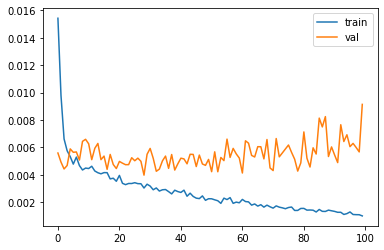

63/63 [==============================] - 2s 7ms/step


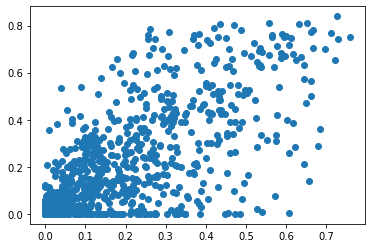

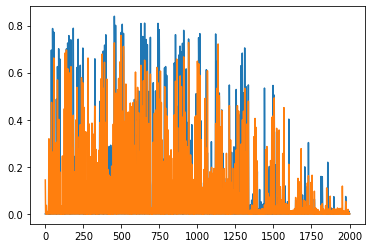

0.10497156697436157


In [ ]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
38/38 [==============================] - 13s 72ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/200
38/38 [==============================] - 1s 34ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 3/200
38/38 [==============================] - 1s 35ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 4/200
38/38 [==============================] - 1s 35ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5/200
38/38 [==============================] - 1s 36ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 6/200
38/38 [==============================] - 1s 35ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 7/200
38/38 [==============================] - 1s 35ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 8/200
38/38 [==============================] - 1s 35ms/step - loss: 0

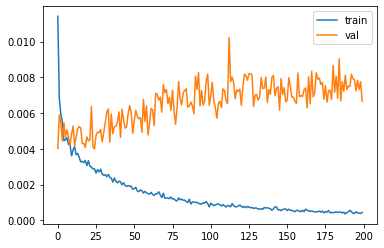

63/63 [==============================] - 2s 6ms/step


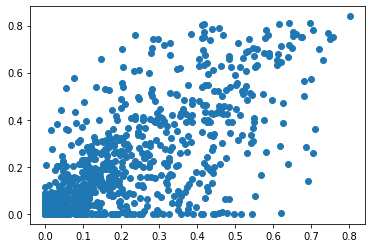

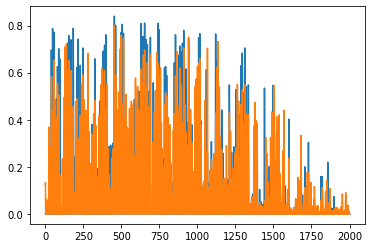

0.10339355646696259
0.04812743218542019


In [ ]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [ ]:
from keras.layers import Bidirectional


Epoch 1/100
38/38 [==============================] - 29s 150ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 4/100
38/38 [==============================] - 3s 93ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 6/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 8/100
38/38 [==============================] - 3s 86ms/step - loss: 

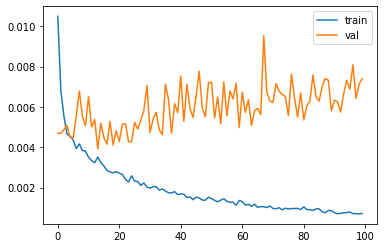

63/63 [==============================] - 3s 13ms/step


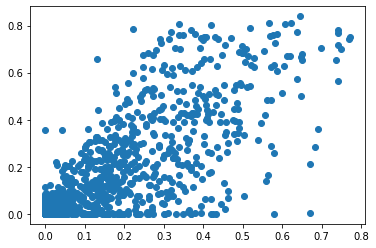

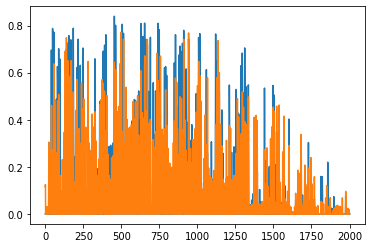

0.10162975839948186
0.04855139858098881


In [ ]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
38/38 [==============================] - 26s 145ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 5/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 7/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/100
38/38 [==============================] - 3s 78ms/step - loss: 

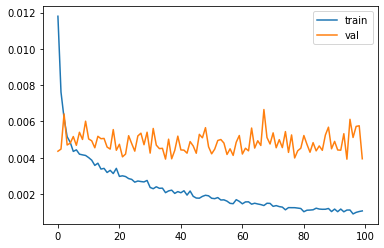

63/63 [==============================] - 5s 13ms/step


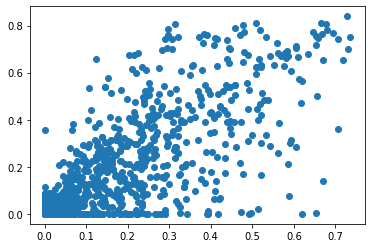

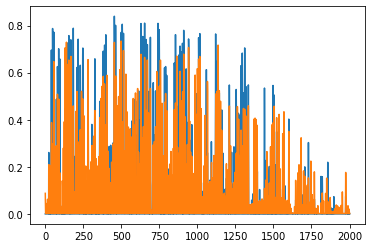

0.1011928913186394
0.04887158868485844


In [ ]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [ ]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 2, 20)             820       
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
38/38 [==============================] - 3s 17ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - val_loss: 0.2483 - val_mean_absolute_error: 0.2483
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - val_loss: 0.1583 - val_mean_absolute_error: 0.1583
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - val_loss: 0.1302 - val_mean_absolute_error: 0.1302
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - val_loss: 0.1262 - val_mean_absolute_error: 0.1262
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - val_loss: 0.1084 - val_mean_absolute_error: 0.1084
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - val_loss: 0.1108 - val_mean_absolute_error: 0.1108
Epoch 7/200
38/38 [==

In [95]:
y=SimRNN.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [96]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.10999427447157799
0.06226346005954516


In [97]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
47/47 [==============================] - 8s 11ms/step - loss: 0.0135
Epoch 2/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0089
Epoch 3/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0063
Epoch 4/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 5/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 6/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0059
Epoch 7/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 8/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0050
Epoch 9/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0048
Epoch 10/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0045
Epoch 11/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0052
Epoch 12/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0046
Epoch 13/200
47/47 [=====

In [98]:
y=regressor1.predict(X_test)

63/63 [==============================] - 3s 3ms/step


In [99]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.107358102702025
0.0517244402854539
